# Importing libraries

In [60]:
from _init_ import *

# Removing Duplicates

In [ ]:
folder_path = "HAM10000_images"
deleted_images = remove_duplicate_images(folder_path)

Finished.


In [62]:
deleted_images[0]

'HAM10000_images/ISIC_0033216.jpg'

In [63]:
# iterate over each element in the list 'deleted_images'
for i in range(0,len(deleted_images)):
    # modify each element by removing the first 16 characters and the last 4 characters
    deleted_images[i] = deleted_images[i][16:-4]

In [64]:
deleted_images[0]

'ISIC_0033216'

In [65]:
# define dataset file paths
dataset_path = "HAM10000_metadata.csv"
output_path = "HAM10000_metadata.csv"
# remove duplicates and save the updated dataset
updated_dataset = remove_duplicates_from_dataset(dataset_path, deleted_images, output_path)


print(updated_dataset.head())

New dataset saved in: HAM10000_metadata.csv
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


# Data Import and Exploration

In [83]:
data = updated_dataset

In [84]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9679 entries, 0 to 9678
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     9679 non-null   object 
 1   image_id      9679 non-null   object 
 2   dx            9679 non-null   object 
 3   dx_type       9679 non-null   object 
 4   age           9623 non-null   float64
 5   sex           9679 non-null   object 
 6   localization  9679 non-null   object 
dtypes: float64(1), object(6)
memory usage: 529.4+ KB


# Data Preparation

In [86]:
data.nunique()

lesion_id       7335
image_id        9679
dx                 7
dx_type            4
age               18
sex                3
localization      15
dtype: int64

Deleting columns age and lesion_id because we decided that they are less important then others.

In [87]:
data_cleaned = data.drop(columns=['age','lesion_id'])

In [88]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9679 entries, 0 to 9678
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      9679 non-null   object
 1   dx            9679 non-null   object
 2   dx_type       9679 non-null   object
 3   sex           9679 non-null   object
 4   localization  9679 non-null   object
dtypes: object(5)
memory usage: 378.2+ KB


In [89]:
data_cleaned['sex'].unique()


array(['male', 'female', 'unknown'], dtype=object)

In [90]:
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned['sex'] == 'unknown'].index)
print(data_cleaned)

          image_id     dx dx_type     sex localization
0     ISIC_0027419    bkl   histo    male        scalp
1     ISIC_0025030    bkl   histo    male        scalp
2     ISIC_0026769    bkl   histo    male        scalp
3     ISIC_0025661    bkl   histo    male        scalp
4     ISIC_0031633    bkl   histo    male          ear
...            ...    ...     ...     ...          ...
9674  ISIC_0033084  akiec   histo    male      abdomen
9675  ISIC_0033550  akiec   histo    male      abdomen
9676  ISIC_0033536  akiec   histo    male      abdomen
9677  ISIC_0032854  akiec   histo    male         face
9678  ISIC_0032258    mel   histo  female         back

[9624 rows x 5 columns]


In [91]:
data_cleaned['sex'].unique()

array(['male', 'female'], dtype=object)

Transfering all observed variables into numbers

In [75]:
data_cleaned['sex'] = data_cleaned['sex'].map({'male': 0, 'female': 1})
data_cleaned['dx'] = data_cleaned['dx'].astype('category').cat.codes
data_cleaned['dx_type'] = data_cleaned['dx_type'].astype('category').cat.codes
data_cleaned['localization'] = data_cleaned['localization'].astype('category').cat.codes

In [76]:
data_cleaned.head()

,image_id,dx,dx_type,sex,localization
0,ISIC_0027419,2,3,0,11
1,ISIC_0025030,2,3,0,11
2,ISIC_0026769,2,3,0,11
3,ISIC_0025661,2,3,0,11
4,ISIC_0031633,2,3,0,4


In [77]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9624 entries, 0 to 9678
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      9624 non-null   object
 1   dx            9624 non-null   int8  
 2   dx_type       9624 non-null   int8  
 3   sex           9624 non-null   int64 
 4   localization  9624 non-null   int8  
dtypes: int64(1), int8(3), object(1)
memory usage: 253.8+ KB


In [78]:
data_cleaned.nunique()

image_id        9624
dx                 7
dx_type            4
sex                2
localization      15
dtype: int64

# Binary Classification for Column 'sex'

# Image Preprocessing and Train-Test Split


In [21]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [21]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned['image_id'],  # features (image IDs)
    data_cleaned['sex'],       # labels (sex)
    test_size=0.2,             # 20% of data for testing
    random_state=42,           # ensure reproducibility
    stratify=data_cleaned['sex'] # maintain class distribution in train/test split
)

In [22]:
# split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    data_cleaned['image_id'], data_cleaned['sex'], test_size=0.2, random_state=42, stratify=data_cleaned['sex'])

In [23]:
# train dataset creation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess).shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# validation dataset creation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.map(preprocess).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# validation dataset creation
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(preprocess).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# 1st Binary Model: Only relu

In [ ]:
model1 = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # flatten input images
    Dense(256, activation='relu'), # fully connected layer with ReLU activation
    BatchNormalization(), # normalize activations for stability
    Dropout(0.3), # reduce overfitting by randomly dropping 30% of neurons
    Dense(128, activation='relu'), # another dense layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # output layer for binary classification
])
# compile the model with adam optimizer and binary cross-entropy loss
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model1.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,617,729 (48.13 MB)

 Trainable params: 12,616,961 (48.13 MB)

 Non-trainable params: 768 (3.00 KB)

In [25]:
# train the model on the training dataset
history1 = model1.fit(
    train_dataset,
    validation_data=val_dataset, # use validation dataset for evaluation
    epochs=10,
    batch_size=32,
    verbose=1
)
# evaluate the model on the test dataset
test_loss1, test_acc1 = model1.evaluate(test_dataset)

print(f"Model 1 - Accuracy: {test_acc1:.2f}")

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.5126 - loss: 0.8425 - val_accuracy: 0.4784 - val_loss: 0.7468
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 51s 202ms/step - accuracy: 0.5356 - loss: 0.7334 - val_accuracy: 0.5049 - val_loss: 0.7504
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 51s 202ms/step - accuracy: 0.5660 - loss: 0.6945 - val_accuracy: 0.5771 - val_loss: 0.6895
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 52s 204ms/step - accuracy: 0.5691 - loss: 0.6949 - val_accuracy: 0.5455 - val_loss: 0.7096
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.5502 - loss: 0.6919 - val_accuracy: 0.5299 - val_loss: 0.6982
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.5671 - loss: 0.6844 - val_accuracy: 0.5444 - val_loss: 0.6935
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.5647 - loss: 0.6883 - val_accuracy: 0.5491 - val_loss: 0.6862
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.5835 - loss: 0

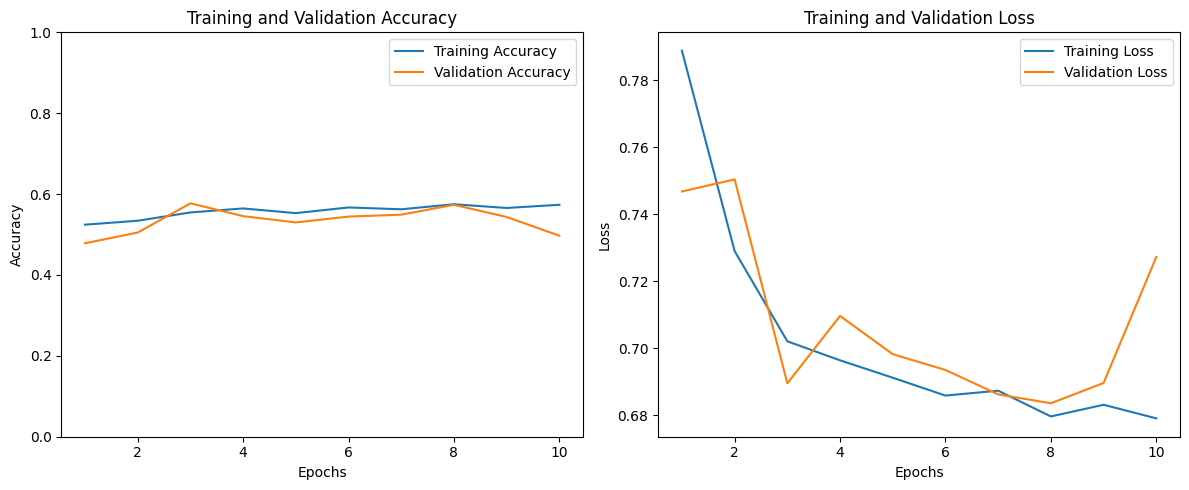

In [26]:
plot_training_history(history1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

2025-01-29 23:28:12.328936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


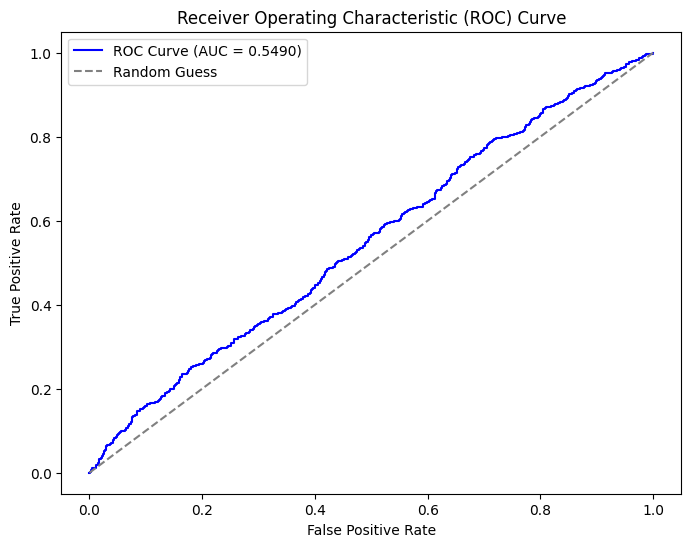

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.62      0.20      0.30      1050
     Class 1       0.47      0.86      0.61       875

    accuracy                           0.50      1925
   macro avg       0.55      0.53      0.45      1925
weighted avg       0.55      0.50      0.44      1925

AUC Score: 0.5490


In [27]:
auc_class_report(test_dataset, model1)

# 2nd Binary Model: tanh and relu

In [ ]:
# define a sequential neural network model
model2 = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # flatten input images
    Dense(512, activation='tanh'), # fully connected layer with tanh activation
    BatchNormalization(), # normalize activations for stability
    Dropout(0.4), # reduce overfitting by randomly dropping 40% of neurons
    Dense(256, activation='relu'), # fully connected layer with relu activation
    BatchNormalization(), 
    Dropout(0.4),
    Dense(128, activation='relu'), # fully connected layer with relu activation
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid') # output layer for binary classification
])
# compile the model with adam optimizer and binary cross-entropy loss
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model2.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,334,273 (96.64 MB)

 Trainable params: 25,332,481 (96.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [29]:
# train the model on the training dataset
history2 = model2.fit(
    train_dataset,
    validation_data=val_dataset, # use validation dataset for evaluation
    epochs=10,
    batch_size=32,
    verbose=1
)
# evaluate the model on the test dataset
test_loss2, test_acc2 = model2.evaluate(test_dataset)

print(f"Model 2 - Accuracy: {test_acc2:.2f}")

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 103s 402ms/step - accuracy: 0.5211 - loss: 0.8969 - val_accuracy: 0.4561 - val_loss: 1.0371
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 88s 357ms/step - accuracy: 0.5139 - loss: 0.7850 - val_accuracy: 0.4545 - val_loss: 1.2921
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 90s 364ms/step - accuracy: 0.5141 - loss: 0.7300 - val_accuracy: 0.4545 - val_loss: 0.7366
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 93s 378ms/step - accuracy: 0.5100 - loss: 0.7115 - val_accuracy: 0.5455 - val_loss: 0.6911
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 94s 378ms/step - accuracy: 0.5234 - loss: 0.6971 - val_accuracy: 0.5455 - val_loss: 0.6917
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 94s 378ms/step - accuracy: 0.5228 - loss: 0.6954 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 88s 357ms/step - accuracy: 0.5377 - loss: 0.6910 - val_accuracy: 0.5455 - val_loss: 0.6911
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 95s 381ms/step - accuracy: 0.5335 - loss: 

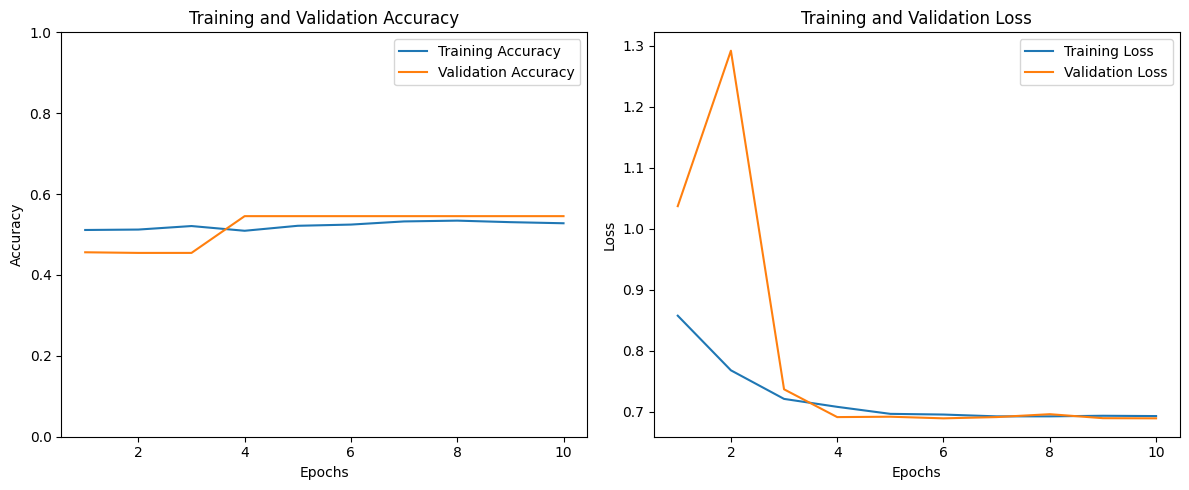

In [30]:
plot_training_history(history2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

2025-01-29 23:44:22.937840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


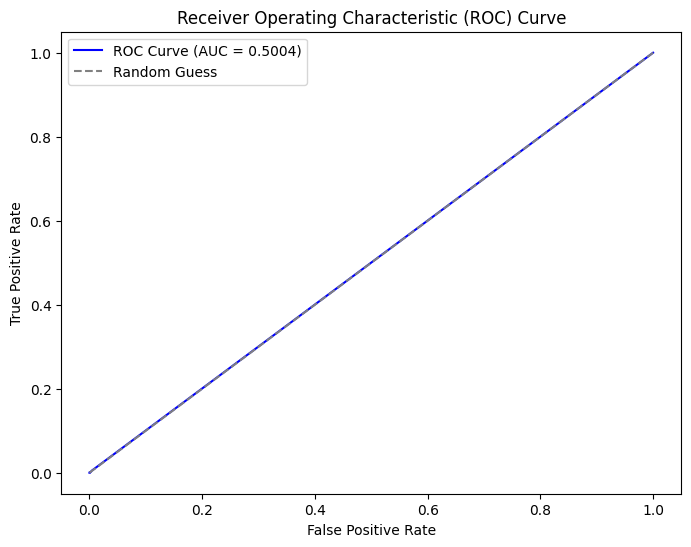

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.55      1.00      0.71      1050
     Class 1       0.00      0.00      0.00       875

    accuracy                           0.55      1925
   macro avg       0.27      0.50      0.35      1925
weighted avg       0.30      0.55      0.39      1925

AUC Score: 0.5004


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [31]:
auc_class_report(test_dataset, model2)

# 3rd Model: L2-regularizer

In [ ]:
# define a sequential neural network model
model3 = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# compile the model with adam optimizer and binary cross-entropy loss
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model3.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,334,273 (96.64 MB)

 Trainable params: 25,332,481 (96.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [33]:
# train the model on the training dataset
history3 = model3.fit(
    train_dataset,
    validation_data=val_dataset, # use validation dataset for evaluation
    epochs=10,
    batch_size=32,
    verbose=1
)
# evaluate the model on the test dataset
test_loss3, test_acc3 = model3.evaluate(test_dataset)

print(f"Model 3 - Accuracy: {test_acc3:.2f}")

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 113s 441ms/step - accuracy: 0.5057 - loss: 11.2495 - val_accuracy: 0.4545 - val_loss: 4.5702
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 105s 425ms/step - accuracy: 0.5188 - loss: 3.8952 - val_accuracy: 0.5174 - val_loss: 2.6309
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 161s 650ms/step - accuracy: 0.5174 - loss: 2.5060 - val_accuracy: 0.4566 - val_loss: 1.8698
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 163s 650ms/step - accuracy: 0.5284 - loss: 1.6565 - val_accuracy: 0.4545 - val_loss: 1.5656
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 168s 688ms/step - accuracy: 0.5342 - loss: 1.2431 - val_accuracy: 0.4530 - val_loss: 1.0948
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 157s 632ms/step - accuracy: 0.5335 - loss: 1.0587 - val_accuracy: 0.4545 - val_loss: 1.2245
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 157s 634ms/step - accuracy: 0.5463 - loss: 1.0234 - val_accuracy: 0.4545 - val_loss: 1.1809
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 151s 603ms/step - accuracy: 0.5495 

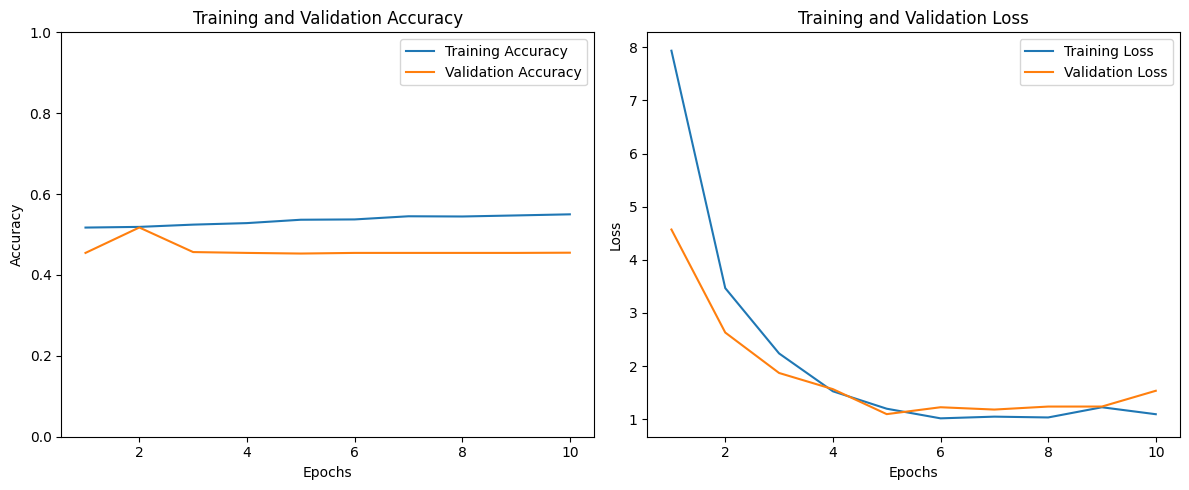

In [34]:
plot_training_history(history3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━

2025-01-30 00:09:19.836661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


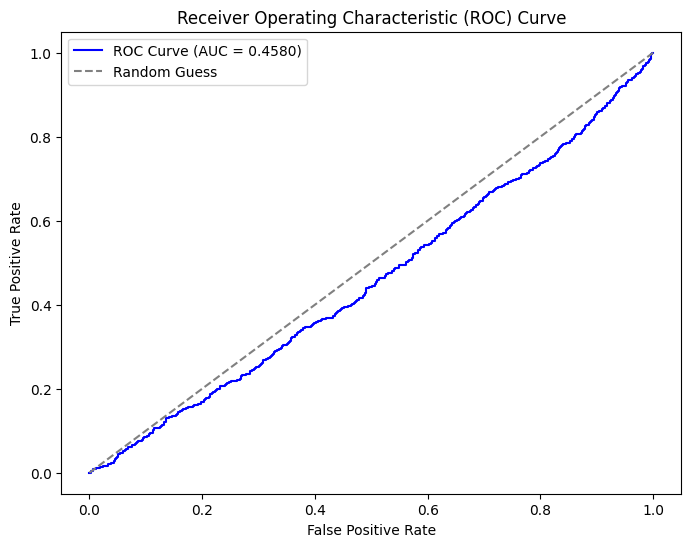

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.00      0.00      1050
     Class 1       0.45      1.00      0.62       875

    accuracy                           0.46      1925
   macro avg       0.56      0.50      0.31      1925
weighted avg       0.57      0.46      0.29      1925

AUC Score: 0.4580


In [35]:
auc_class_report(test_dataset, model3)

# Multiclass Classification for dx column:

In [20]:
image_paths = []
for image_id in data_cleaned['image_id']:
    image_paths.append('HAM10000_images/'+image_id+'.jpg')

# define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # monitor validation loss
    patience=5,                 # stop training after 5 epochs of no improvement
    restore_best_weights=True   # restore weights from the best epoch
)

# Data Preparation

In [22]:
num_classes = 7

target = pd.get_dummies(data_cleaned['dx'], prefix='dx')

# combine image paths and labels
data_combined = pd.DataFrame({
    'path': image_paths,
    'label': target.idxmax(axis=1)  # convert one-hot encoding to class indices
})

# apply oversampling or undersampling
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
data_balanced, labels_balanced = over_sampler.fit_resample(
    data_combined[['path']], data_combined['label']
)

# prepare balanced datasets
balanced_image_paths = data_balanced['path'].values
balanced_labels = pd.get_dummies(labels_balanced, prefix='dx').values

# split balanced data
train_paths, test_paths, train_labels, test_labels = train_test_split(
    balanced_image_paths, balanced_labels, test_size=0.2, random_state=42, stratify=balanced_labels
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print(f"Balanced Train samples: {len(train_paths)}")
print(f"Balanced Validation samples: {len(val_paths)}")
print(f"Balanced Test samples: {len(test_paths)}")


Balanced Train samples: 28600
Balanced Validation samples: 7150
Balanced Test samples: 8938


In [24]:
train_df = prepare_dataframe(train_paths, train_labels)
val_df = prepare_dataframe(val_paths, val_labels)
test_df = prepare_dataframe(test_paths, test_labels)

# pass dataframes for training, validation, and test
dataframes = {'train': train_df, 'val': val_df, 'test': test_df}
batch_size = 32
target_size = (IMG_HEIGHT, IMG_WIDTH)
train_generator, val_generator, test_generator = create_image_generators(dataframes, batch_size, target_size)

Found 28600 validated image filenames belonging to 7 classes.
Found 7150 validated image filenames belonging to 7 classes.
Found 8938 validated image filenames belonging to 7 classes.


# 1st Model for dx column: Baseline CNN

In [25]:
# create a baseline cnn model
cnn_model = Sequential([
    # convolutional layers + max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # flatten the data
    Flatten(),

    # fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # dropout to reduce overfitting

    Dense(num_classes, activation='softmax')  # output layer for multi-class classification
])

# compile the model
cnn_model.compile(
    optimizer='adam',  # adam optimizer
    loss='categorical_crossentropy',  # loss function for one-hot encoded labels
    metrics=['accuracy']  # accuracy metric
)

# display model summary
cnn_model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history_cnn = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 921s 1s/step - accuracy: 0.2778 - loss: 1.7491 - val_accuracy: 0.4683 - val_loss: 1.3216
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 891s 996ms/step - accuracy: 0.4575 - loss: 1.3909 - val_accuracy: 0.5585 - val_loss: 1.1535
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 678s 758ms/step - accuracy: 0.5109 - loss: 1.2543 - val_accuracy: 0.5550 - val_loss: 1.1472
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 689s 770ms/step - accuracy: 0.5375 - loss: 1.1867 - val_accuracy: 0.6178 - val_loss: 0.9878
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 673s 752ms/step - accuracy: 0.5627 - loss: 1.1145 - val_accuracy: 0.6438 - val_loss: 0.9376
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 658s 736ms/step - accuracy: 0.5967 - loss: 1.0642 - val_accuracy: 0.6621 - val_loss: 0.8938
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 653s 731ms/step - accuracy: 0.6022 - loss: 1.0284 - val_accuracy: 0.6719 - val_loss: 0.8650
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 670s 750ms/step - accuracy: 0.6239 - lo

280/280 ━━━━━━━━━━━━━━━━━━━━ 84s 301ms/step


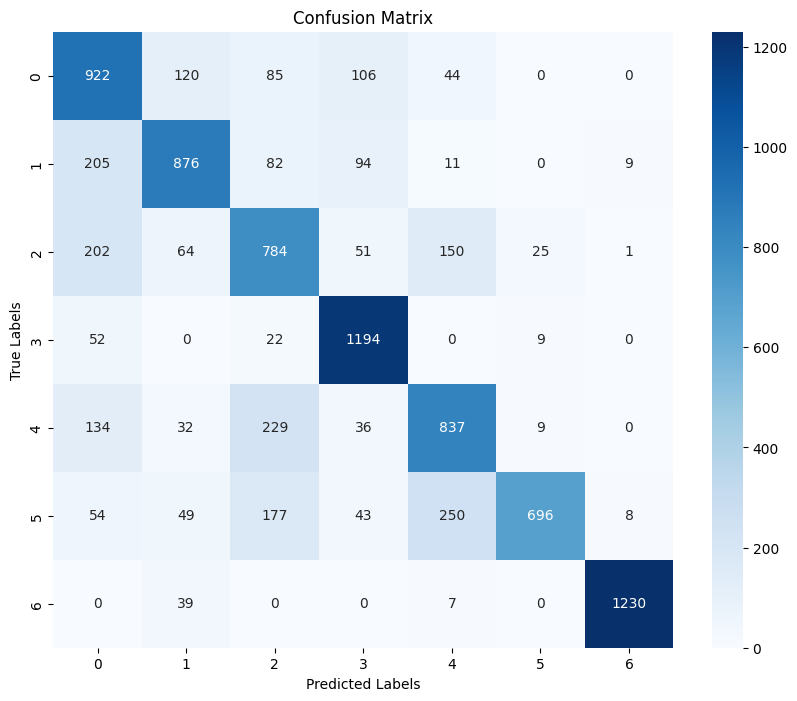

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      1277
           1       0.74      0.69      0.71      1277
           2       0.57      0.61      0.59      1277
           3       0.78      0.94      0.85      1277
           4       0.64      0.66      0.65      1277
           5       0.94      0.55      0.69      1277
           6       0.99      0.96      0.97      1276

    accuracy                           0.73      8938
   macro avg       0.75      0.73      0.73      8938
weighted avg       0.75      0.73      0.73      8938



In [27]:
matrix_class_report(cnn_model, test_generator)

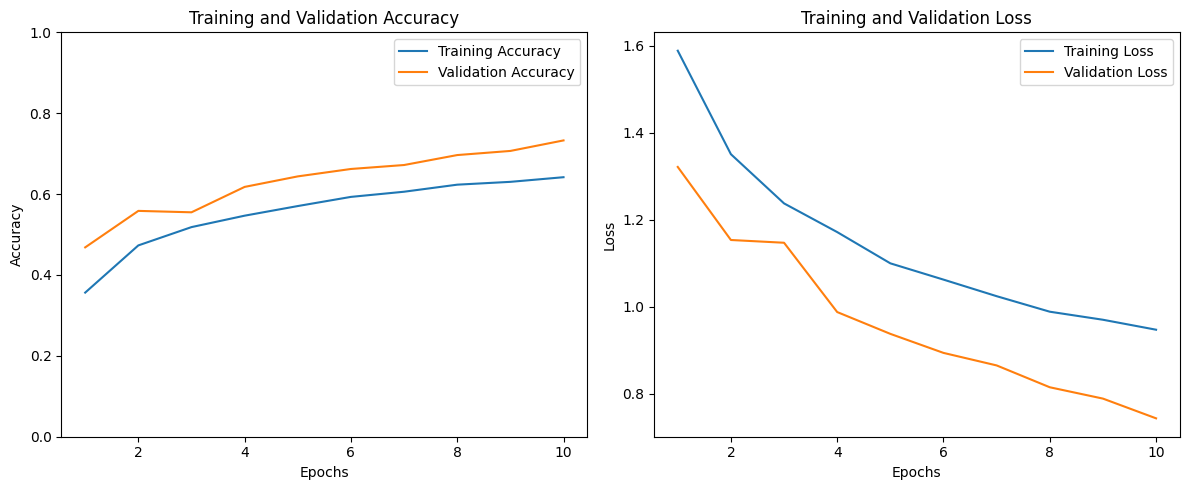

In [28]:
plot_training_history(history_cnn)

# 2nd Model: VGG 16

In [29]:
# example of transfer learning with vgg16
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# freeze the convolutional base
base_model_vgg.trainable = False

# add custom classification layers
model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile the model
model_vgg.compile(
    optimizer='adam',  # adam optimizer
    loss='categorical_crossentropy',  # loss function for one-hot encoded labels
    metrics=['accuracy']  # accuracy metric
)

In [30]:
history_vgg = model_vgg.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 2413s 3s/step - accuracy: 0.3417 - loss: 1.6904 - val_accuracy: 0.5221 - val_loss: 1.2670
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 2906s 3s/step - accuracy: 0.4392 - loss: 1.4193 - val_accuracy: 0.5698 - val_loss: 1.1853
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 6140s 7s/step - accuracy: 0.4742 - loss: 1.3537 - val_accuracy: 0.6027 - val_loss: 1.0492
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 2915s 3s/step - accuracy: 0.4894 - loss: 1.3092 - val_accuracy: 0.5989 - val_loss: 1.0402
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 3207s 4s/step - accuracy: 0.5113 - loss: 1.2714 - val_accuracy: 0.6220 - val_loss: 1.0315


280/280 ━━━━━━━━━━━━━━━━━━━━ 627s 2s/step


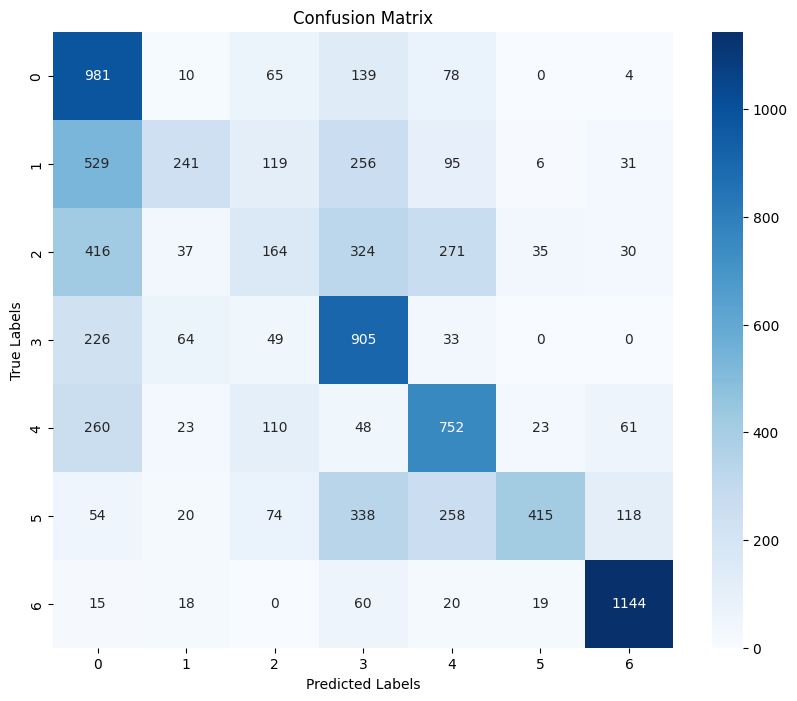

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.77      0.52      1277
           1       0.58      0.19      0.29      1277
           2       0.28      0.13      0.18      1277
           3       0.44      0.71      0.54      1277
           4       0.50      0.59      0.54      1277
           5       0.83      0.32      0.47      1277
           6       0.82      0.90      0.86      1276

    accuracy                           0.51      8938
   macro avg       0.55      0.51      0.48      8938
weighted avg       0.55      0.51      0.48      8938



In [31]:
matrix_class_report(model_vgg, test_generator)

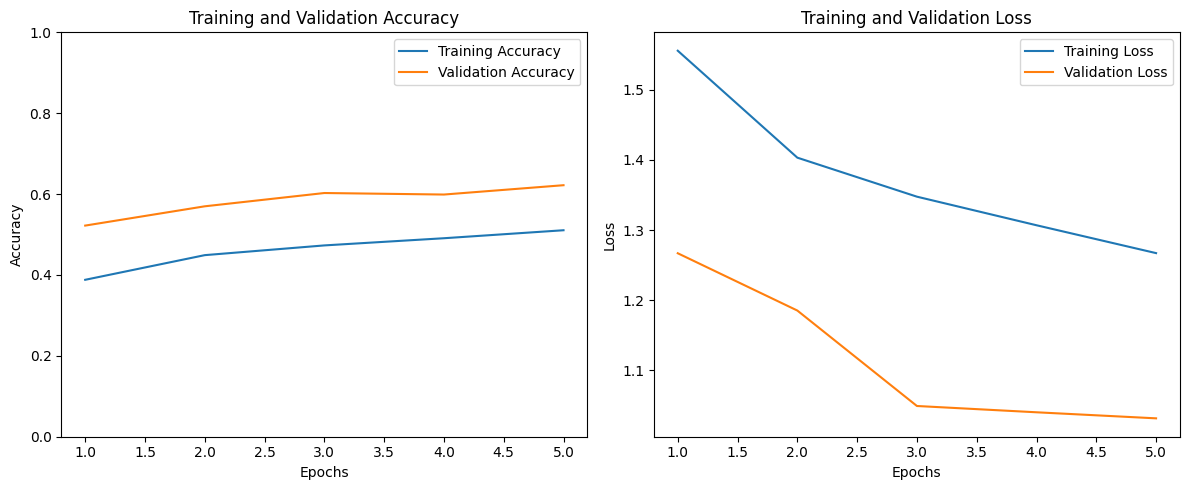

In [32]:
plot_training_history(history_vgg)

# Multiclass Classification for column 'dx_type'

# Data Preparation

In [33]:
num_classes = 4

target = pd.get_dummies(data_cleaned['dx_type'], prefix='dx_type')

# combine image paths and labels
data_combined = pd.DataFrame({
    'path': image_paths,
    'label': target.idxmax(axis=1)  # convert one-hot encoding to class indices
})

# apply oversampling or undersampling
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
data_balanced, labels_balanced = over_sampler.fit_resample(
    data_combined[['path']], data_combined['label']
)

# prepare balanced datasets
balanced_image_paths = data_balanced['path'].values
balanced_labels = pd.get_dummies(labels_balanced, prefix='dx_type').values

# split balanced data
train_paths, test_paths, train_labels, test_labels = train_test_split(
    balanced_image_paths, balanced_labels, test_size=0.2, random_state=42, stratify=balanced_labels
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print(f"Balanced Train samples: {len(train_paths)}")
print(f"Balanced Validation samples: {len(val_paths)}")
print(f"Balanced Test samples: {len(test_paths)}")


Balanced Train samples: 13094
Balanced Validation samples: 3274
Balanced Test samples: 4092


In [34]:
train_df = prepare_dataframe(train_paths, train_labels)
val_df = prepare_dataframe(val_paths, val_labels)
test_df = prepare_dataframe(test_paths, test_labels)

# pass dataframes for training, validation, and test
dataframes = {'train': train_df, 'val': val_df, 'test': test_df}
batch_size = 32
target_size = (IMG_HEIGHT, IMG_WIDTH)
train_generator, val_generator, test_generator = create_image_generators(dataframes, batch_size, target_size)

Found 13094 validated image filenames belonging to 4 classes.
Found 3274 validated image filenames belonging to 4 classes.
Found 4092 validated image filenames belonging to 4 classes.


# 1st Model: ResNet

In [35]:
# example of transfer learning with resnet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# freeze the convolutional base
base_model_resnet.trainable = False

# add custom classification layers
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile the model
model_resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [36]:
history_resnet = model_resnet.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 387s 929ms/step - accuracy: 0.2641 - loss: 1.4188 - val_accuracy: 0.4988 - val_loss: 1.3768
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 1452s 4s/step - accuracy: 0.2847 - loss: 1.3790 - val_accuracy: 0.5113 - val_loss: 1.3576
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 372s 904ms/step - accuracy: 0.3269 - loss: 1.3598 - val_accuracy: 0.2706 - val_loss: 1.3259
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 378s 921ms/step - accuracy: 0.3621 - loss: 1.3249 - val_accuracy: 0.3873 - val_loss: 1.2687
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 367s 895ms/step - accuracy: 0.3791 - loss: 1.2972 - val_accuracy: 0.4658 - val_loss: 1.2345


128/128 ━━━━━━━━━━━━━━━━━━━━ 82s 628ms/step


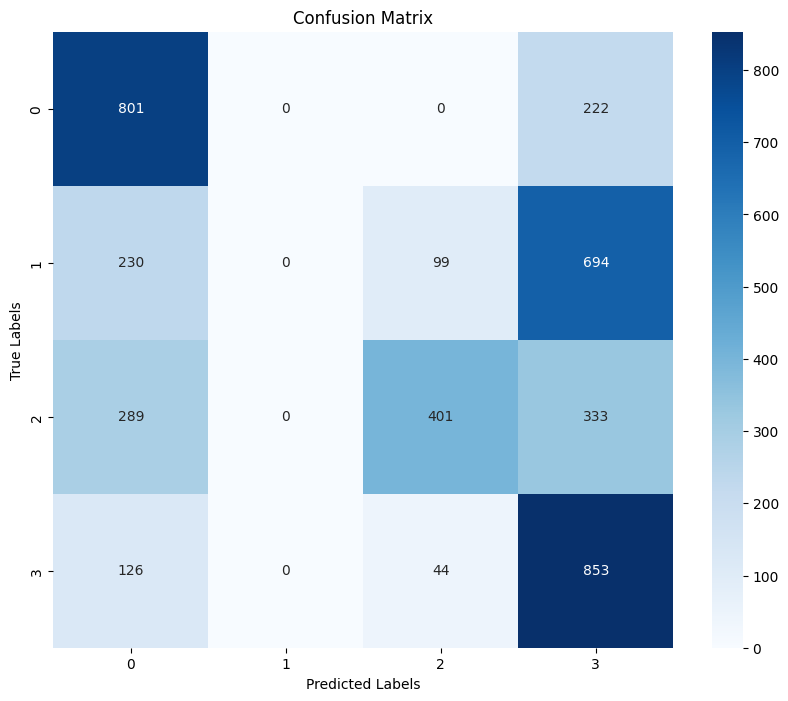

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.65      1023
           1       0.00      0.00      0.00      1023
           2       0.74      0.39      0.51      1023
           3       0.41      0.83      0.55      1023

    accuracy                           0.50      4092
   macro avg       0.42      0.50      0.43      4092
weighted avg       0.42      0.50      0.43      4092



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [37]:
matrix_class_report(model_resnet, test_generator)

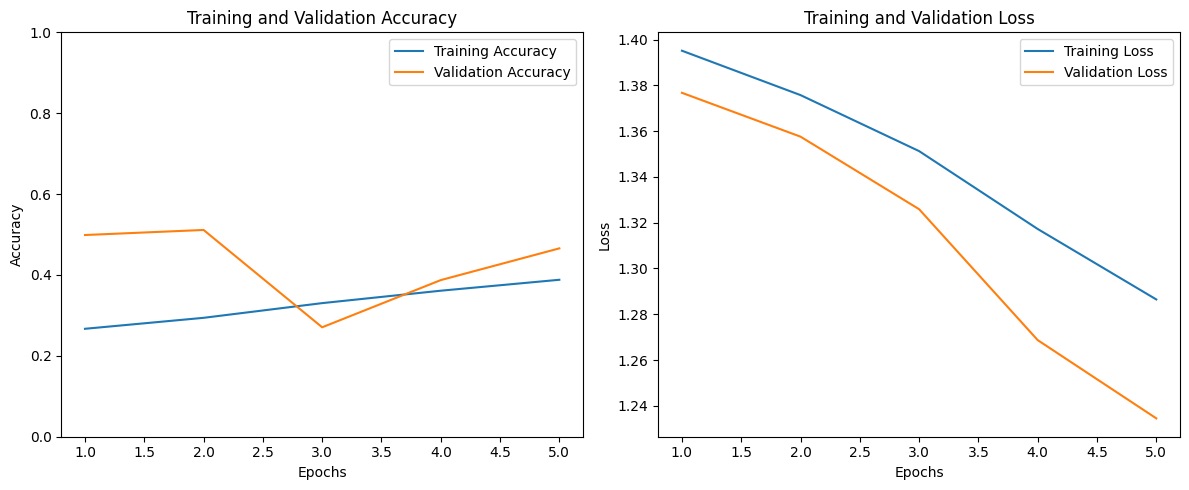

In [38]:
plot_training_history(history_resnet)

# 2nd Model: Fully Connected Networks (without using CNN)

In [39]:
model_fcn = Sequential([
    Flatten(input_shape=input_shape),  # flatten the input image

    Dense(512, activation='relu'),  # first dense layer
    Dropout(0.5),  # dropout to reduce overfitting

    Dense(256, activation='relu'),  # second dense layer
    Dropout(0.5),

    Dense(128, activation='relu'),  # third dense layer

    Dense(num_classes, activation='softmax')  # output layer with softmax activation
])

model_fcn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# initialize and compile the model
model_fcn.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,331,076 (96.63 MB)

 Trainable params: 25,331,076 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history_fcn = model_fcn.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 239s 577ms/step - accuracy: 0.2522 - loss: 7.5849 - val_accuracy: 0.2502 - val_loss: 1.3864
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 240s 586ms/step - accuracy: 0.2502 - loss: 1.4030 - val_accuracy: 0.2502 - val_loss: 1.3863
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 251s 612ms/step - accuracy: 0.2580 - loss: 1.3966 - val_accuracy: 0.2498 - val_loss: 1.3863
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 246s 600ms/step - accuracy: 0.2516 - loss: 1.3868 - val_accuracy: 0.2502 - val_loss: 1.3863
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 242s 588ms/step - accuracy: 0.2511 - loss: 1.4200 - val_accuracy: 0.2502 - val_loss: 1.3864


128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 270ms/step


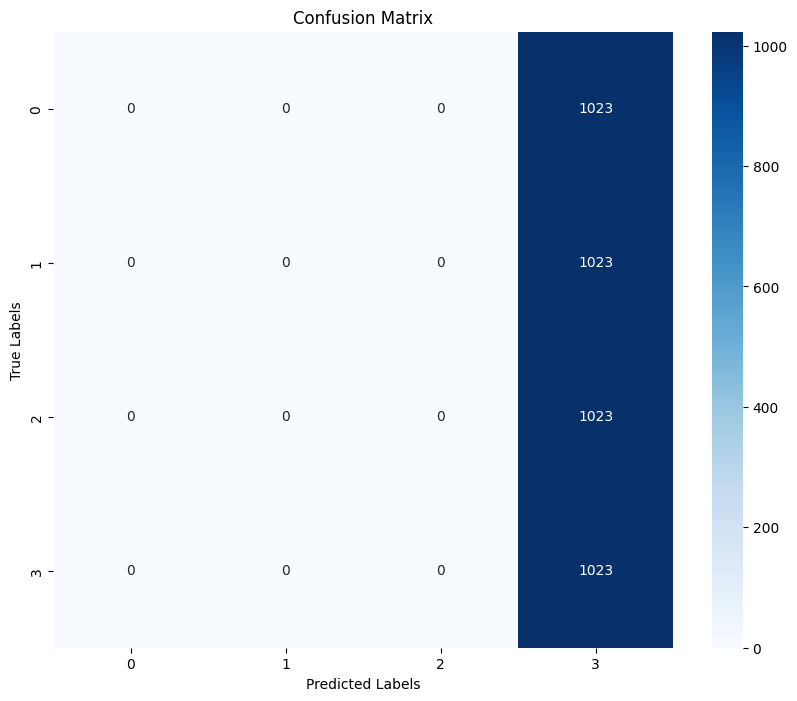

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1023
           1       0.00      0.00      0.00      1023
           2       0.00      0.00      0.00      1023
           3       0.25      1.00      0.40      1023

    accuracy                           0.25      4092
   macro avg       0.06      0.25      0.10      4092
weighted avg       0.06      0.25      0.10      4092



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [41]:
matrix_class_report(model_fcn, test_generator)

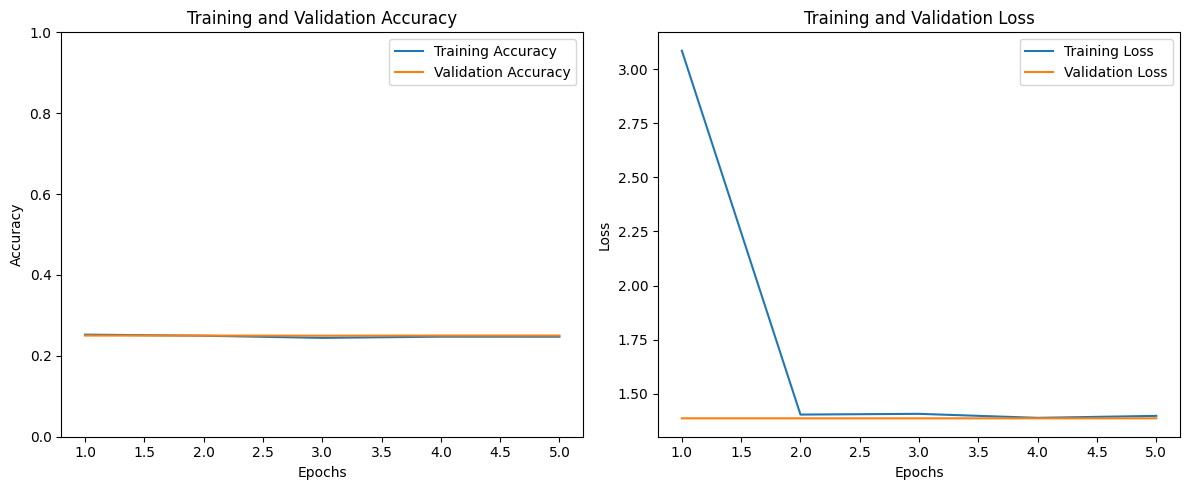

In [42]:
plot_training_history(history_fcn)

# Multiclass Classification for column 'localization'

# Data Preparation

In [49]:
num_classes = 15

target = pd.get_dummies(data_cleaned['localization'], prefix='localization')

# combine image paths and labels
data_combined = pd.DataFrame({
    'path': image_paths,
    'label': target.idxmax(axis=1)  # convert one-hot encoding to class indices
})

# apply oversampling or undersampling
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
data_balanced, labels_balanced = over_sampler.fit_resample(
    data_combined[['path']], data_combined['label']
)

# prepare balanced datasets
balanced_image_paths = data_balanced['path'].values
balanced_labels = pd.get_dummies(labels_balanced, prefix='localization').values

# split balanced data
train_paths, test_paths, train_labels, test_labels = train_test_split(
    balanced_image_paths, balanced_labels, test_size=0.2, random_state=42, stratify=balanced_labels
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print(f"Balanced Train samples: {len(train_paths)}")
print(f"Balanced Validation samples: {len(val_paths)}")
print(f"Balanced Test samples: {len(test_paths)}")


Balanced Train samples: 20256
Balanced Validation samples: 5064
Balanced Test samples: 6330


In [50]:
train_df = prepare_dataframe(train_paths, train_labels)
val_df = prepare_dataframe(val_paths, val_labels)
test_df = prepare_dataframe(test_paths, test_labels)

# pass dataframes for training, validation, and test
dataframes = {'train': train_df, 'val': val_df, 'test': test_df}
batch_size = 32
target_size = (IMG_HEIGHT, IMG_WIDTH)
train_generator, val_generator, test_generator = create_image_generators(dataframes, batch_size, target_size)

Found 20256 validated image filenames belonging to 15 classes.
Found 5064 validated image filenames belonging to 15 classes.
Found 6330 validated image filenames belonging to 15 classes.


#  1st Model: Autoencoder and Classifier

In [51]:
# create the autoencoder
autoencoder = create_autoencoder(input_shape)

# create the classification model
classifier = create_classifier(autoencoder, num_classes)

# print model summaries
classifier.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (MaxPooling2D)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,296,911 (16.39 MB)

 Trainable params: 4,296,911 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_class = classifier.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 410s 645ms/step - accuracy: 0.1440 - loss: 2.5486 - val_accuracy: 0.2761 - val_loss: 2.2149
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 425s 670ms/step - accuracy: 0.2701 - loss: 2.2127 - val_accuracy: 0.3381 - val_loss: 2.0365
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 8797s 14s/step - accuracy: 0.3262 - loss: 2.0312 - val_accuracy: 0.3624 - val_loss: 1.8997
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 548s 867ms/step - accuracy: 0.3506 - loss: 1.9414 - val_accuracy: 0.3624 - val_loss: 1.8917
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 614s 970ms/step - accuracy: 0.3820 - loss: 1.8321 - val_accuracy: 0.4054 - val_loss: 1.7680


198/198 ━━━━━━━━━━━━━━━━━━━━ 81s 406ms/step


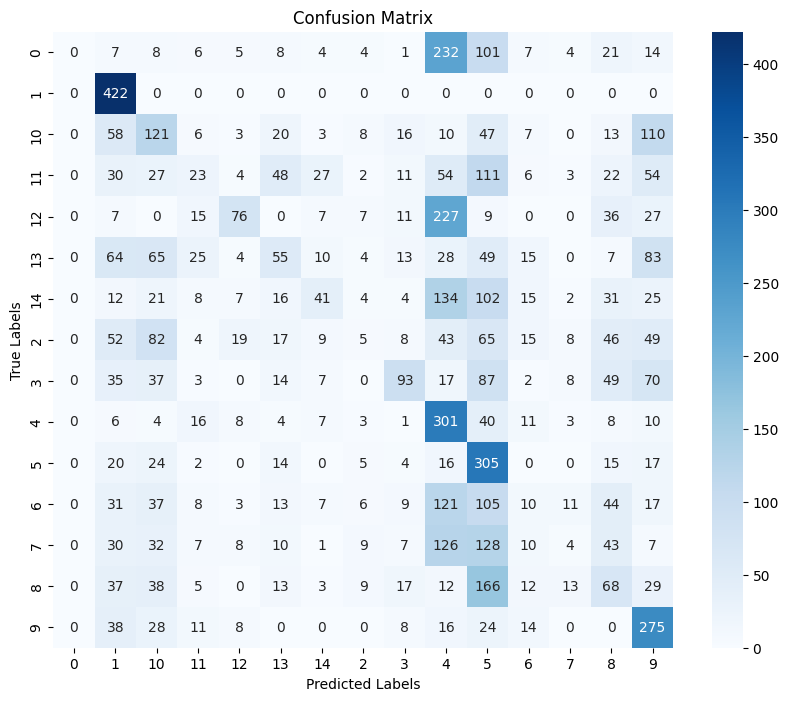

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       422
           1       0.50      1.00      0.66       422
          10       0.23      0.29      0.26       422
          11       0.17      0.05      0.08       422
          12       0.52      0.18      0.27       422
          13       0.24      0.13      0.17       422
          14       0.33      0.10      0.15       422
           2       0.08      0.01      0.02       422
           3       0.46      0.22      0.30       422
           4       0.23      0.71      0.34       422
           5       0.23      0.72      0.35       422
           6       0.08      0.02      0.04       422
           7       0.07      0.01      0.02       422
           8       0.17      0.16      0.16       422
           9       0.35      0.65      0.45       422

    accuracy                           0.28      6330
   macro avg       0.24      0.28      0.22      6330
wei

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [53]:
matrix_class_report(classifier, test_generator)

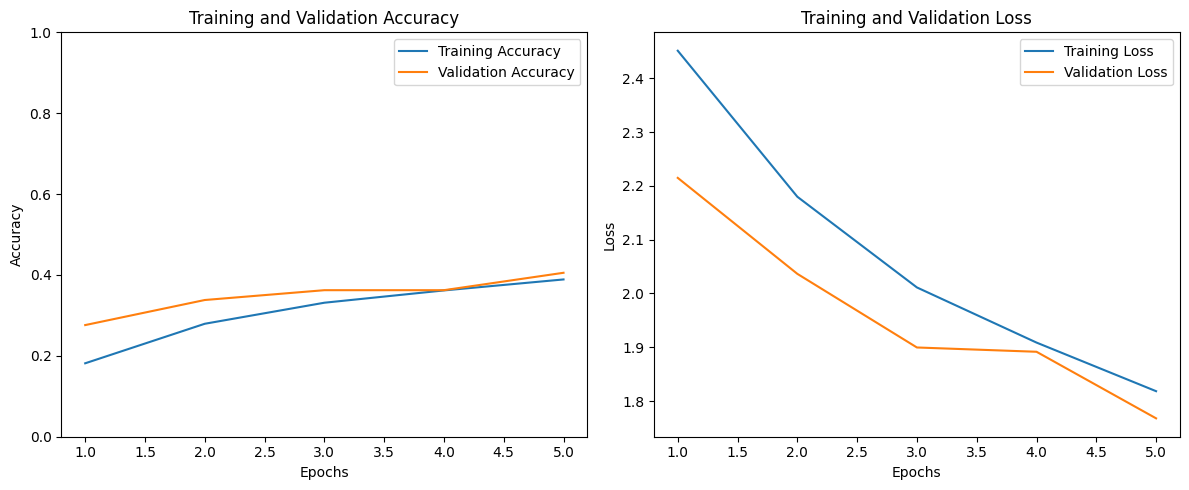

In [54]:
plot_training_history(history_class)

# 2nd Model: DenseNet

In [55]:
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# freeze the convolutional base
base_model_densenet.trainable = False

# add custom classification layers
model_densenet = Sequential([
    base_model_densenet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile the model
model_densenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
history_densenet = model_densenet.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 1115s 2s/step - accuracy: 0.2444 - loss: 2.3762 - val_accuracy: 0.4216 - val_loss: 1.7162
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 1263s 2s/step - accuracy: 0.3878 - loss: 1.8557 - val_accuracy: 0.4536 - val_loss: 1.6123
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 1381s 2s/step - accuracy: 0.4115 - loss: 1.7489 - val_accuracy: 0.4828 - val_loss: 1.5072
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 1491s 2s/step - accuracy: 0.4395 - loss: 1.6602 - val_accuracy: 0.5051 - val_loss: 1.4533
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 1339s 2s/step - accuracy: 0.4628 - loss: 1.5987 - val_accuracy: 0.5292 - val_loss: 1.3866


198/198 ━━━━━━━━━━━━━━━━━━━━ 188s 921ms/step


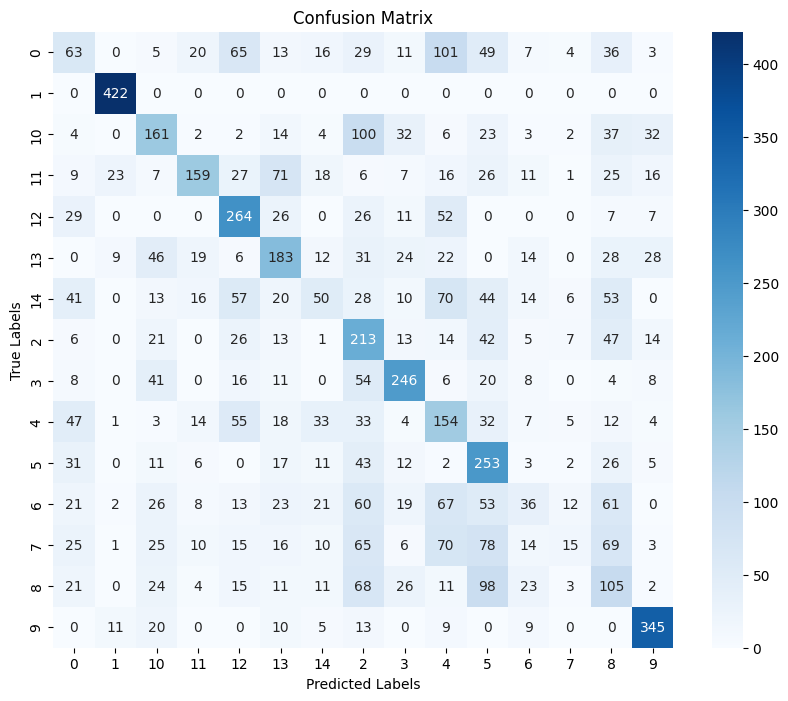

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.15      0.17       422
           1       0.90      1.00      0.95       422
          10       0.40      0.38      0.39       422
          11       0.62      0.38      0.47       422
          12       0.47      0.63      0.54       422
          13       0.41      0.43      0.42       422
          14       0.26      0.12      0.16       422
           2       0.28      0.50      0.36       422
           3       0.58      0.58      0.58       422
           4       0.26      0.36      0.30       422
           5       0.35      0.60      0.44       422
           6       0.23      0.09      0.12       422
           7       0.26      0.04      0.06       422
           8       0.21      0.25      0.23       422
           9       0.74      0.82      0.78       422

    accuracy                           0.42      6330
   macro avg       0.41      0.42      0.40      6330
wei

In [57]:
matrix_class_report(model_densenet, test_generator)

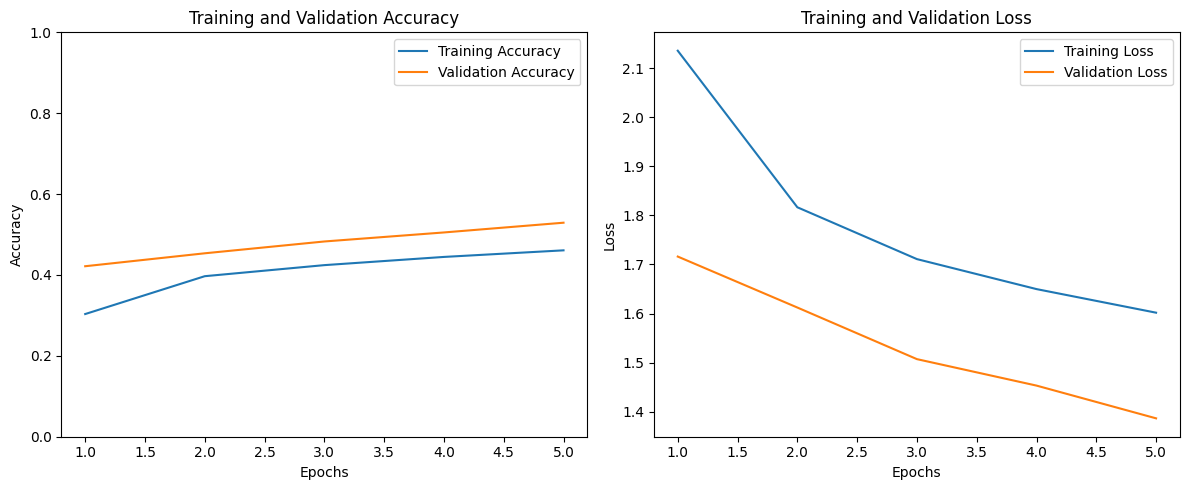

In [58]:
plot_training_history(history_densenet)